# Mexit better

In [1]:
# HDI by Ariadna

In [2]:
# Dependencies and Setup
# %matplotlib inline
# %matplotlib notebook
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

tablamun=pd.read_csv("Table/indicadores_municipios.csv",  encoding ='latin1')
pd.set_option('display.max_columns', 500)
tablamun.head()
# tablamun.count()
# tablamun.dtypes

,id_edo,id_mun,edo,municipio,escolaridad,idh,ictpc_mun_2010
0,9,2,Distrito Federal,Azcapotzalco,10.74,0.832,4588
1,9,3,Distrito Federal,Coyoacán,11.72,0.867,5674
2,9,4,Distrito Federal,Cuajimalpa de Morelos,10.43,0.825,6449
3,9,5,Distrito Federal,Gustavo A. Madero,9.96,0.806,3573
4,9,6,Distrito Federal,Iztacalco,10.59,0.822,4164


### Create dataframe for CDMX

In [3]:

cdmx= tablamun.loc[tablamun["id_edo"] == 9, :]
cdmx = cdmx.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
cdmx["State per capita income"] = cdmx["Average per capita income"].mean()
cdmx["State HDI"] = cdmx["Human Development Index"].mean()
cdmx["HDI ranking"]= cdmx["Human Development Index"].rank(ascending=False)

cdmx.head()

,State ID,Municipality ID,State,Municipality,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking
0,9,2,Distrito Federal,Azcapotzalco,10.74,0.832,4588,4698.875,0.823875,5.0
1,9,3,Distrito Federal,Coyoacán,11.72,0.867,5674,4698.875,0.823875,3.0
2,9,4,Distrito Federal,Cuajimalpa de Morelos,10.43,0.825,6449,4698.875,0.823875,7.0
3,9,5,Distrito Federal,Gustavo A. Madero,9.96,0.806,3573,4698.875,0.823875,12.5
4,9,6,Distrito Federal,Iztacalco,10.59,0.822,4164,4698.875,0.823875,8.0


### Create dataframe for EdoMex

In [4]:
edomex= tablamun.loc[tablamun["id_edo"] == 15, :]
edomex = edomex.rename(columns = {"id_edo": "State ID", "edo": "State" , "id_mun":"Municipality ID", 
                          "municipio" : "Municipality", "escolaridad": "Average years of school",
                         "idh": "Human Development Index", "ictpc_mun_2010": "Average per capita income"}) 
edomex["State per capita income"] = edomex["Average per capita income"].mean()
edomex["State HDI"] = edomex["Human Development Index"].mean()
edomex["HDI ranking"]= edomex["Human Development Index"].rank(ascending=True)
edomex.head()
edomex.describe()


,State ID,Municipality ID,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking
count,125.0,125.000000,125.000000,125.000000,125.000000,1.250000e+02,1.250000e+02,125.000000
mean,15.0,63.000000,7.413280,0.690456,2032.072000,2.032072e+03,6.904560e-01,63.000000
std,0.0,36.228442,1.609747,0.059216,794.997161,6.848660e-12,2.229381e-16,36.226216
min,15.0,1.000000,3.960000,0.545000,795.000000,2.032072e+03,6.904560e-01,1.000000
25%,15.0,32.000000,6.110000,0.646000,1524.000000,2.032072e+03,6.904560e-01,32.000000
50%,15.0,63.000000,7.570000,0.695000,1889.000000,2.032072e+03,6.904560e-01,63.000000
75%,15.0,94.000000,8.590000,0.735000,2258.000000,2.032072e+03,6.904560e-01,94.000000
max,15.0,125.000000,11.810000,0.825000,4753.000000,2.032072e+03,6.904560e-01,125.000000


### Create dataframe both sets

In [5]:
tabla_tot = pd.concat([cdmx, edomex])
tabla_tot["HDI Ranking CDMX & Edomex"]= tabla_tot["Human Development Index"].rank(ascending=True)
tabla_tot.head()

,State ID,Municipality ID,State,Municipality,Average years of school,Human Development Index,Average per capita income,State per capita income,State HDI,HDI ranking,HDI Ranking CDMX & Edomex
0,9,2,Distrito Federal,Azcapotzalco,10.74,0.832,4588,4698.875,0.823875,5.0,137.0
1,9,3,Distrito Federal,Coyoacán,11.72,0.867,5674,4698.875,0.823875,3.0,139.0
2,9,4,Distrito Federal,Cuajimalpa de Morelos,10.43,0.825,6449,4698.875,0.823875,7.0,134.5
3,9,5,Distrito Federal,Gustavo A. Madero,9.96,0.806,3573,4698.875,0.823875,12.5,127.5
4,9,6,Distrito Federal,Iztacalco,10.59,0.822,4164,4698.875,0.823875,8.0,133.0


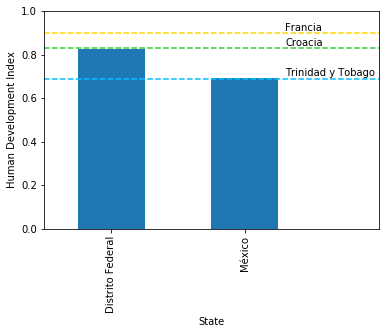

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a group based on states
state_group = tabla_tot.groupby('State')
state_idh=state_group['Human Development Index'].mean()

# Create a bar chart 
state_idh_graph = state_idh.plot(kind='bar')

plt.xlim(-0.5, 2)
plt.ylim(0, 1)


# Set the xlabel and ylabel using class methods
state_idh_graph.set_xlabel("State")
state_idh_graph.set_ylabel("Human Development Index")


plt.axhline(y=0.830, color='limegreen', linestyle='--')
plt.text(1.3,0.84, 'Croacia')
plt.axhline(y=0.901, color='gold', linestyle='--')
plt.text(1.3,0.91, 'Francia')
plt.axhline(y=0.69, color='deepskyblue', linestyle='--')
plt.text(1.3,0.70, 'Trinidad y Tobago')

plt.show()
plt.tight_layout()

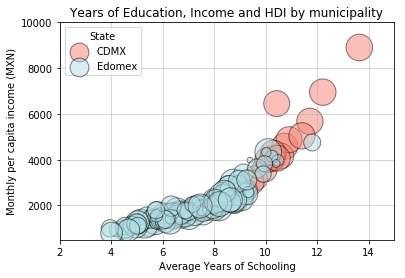

<Figure size 1440x1440 with 0 Axes>

In [7]:
# Build the scatter plot
fig, ax = plt.subplots()

plt.scatter(cdmx["Average years of school"], cdmx["Average per capita income"], marker="o", facecolors="salmon", edgecolors="black", 
             s=tabla_tot["HDI Ranking CDMX & Edomex"]*5, alpha=0.5, label="CDMX")
plt.scatter(edomex["Average years of school"], edomex["Average per capita income"], marker="o", facecolors="powderblue", edgecolors="black", 
              s=tabla_tot["HDI Ranking CDMX & Edomex"]*5 ,alpha=0.5,  label="Edomex")

# Incorporate the other graph properties

plt.xlim(2, 15)
plt.ylim(500, 10000)
ax.grid(linestyle='-', linewidth='0.5',)
plt.title('Years of Education, Income and HDI by municipality')

plt.xlabel('Average Years of Schooling')
plt.ylabel('Monthly per capita income (MXN)')

# Create a legend
plt.legend(loc="best", fancybox=True, title="State")

# # Incorporate a text label regarding circle size
# plt.text(42,35, 'Note:\nCircle size correlates with driver count per City')

# # Save Figure
# plt.savefig('PyberScatterPlot.png')
plt.figure(figsize=(20,20))
#Show plot
plt.show()

/home/erick/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



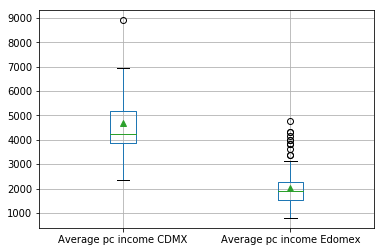

In [8]:
# Income quartiles

cdmx["Average per capita income"].describe()
edomex["Average per capita income"].describe()

# Income stats
cdmx_q1 = np.percentile(cdmx["Average per capita income"], 25)
cdmx_q3 = np.percentile(cdmx["Average per capita income"], 75)
cdmx_max = np.max(cdmx["Average per capita income"])
cdmx_min = np.min(cdmx["Average per capita income"])
cdmx_mean = np.mean(cdmx["Average per capita income"])

edomex_q1 = np.percentile(edomex["Average per capita income"], 25)
edomex_q3 = np.percentile(edomex["Average per capita income"], 75)
edomex_max = np.max(edomex["Average per capita income"])
edomex_min = np.min(edomex["Average per capita income"])
edomex_mean = np.mean(edomex["Average per capita income"])

# Outliers

cdmx_iqr = (cdmx_q3 - cdmx_q1)
cdmx_lb = cdmx_q1 - (1.5 * cdmx_iqr)
cdmx_ub = cdmx_q3 + (1.5 * cdmx_iqr)

cdmx['Very high income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x >=cdmx_ub else 0)
cdmx['Very low income'] = cdmx['Average per capita income'].apply(lambda x: 1 if x <=cdmx_lb else 0)


edomex_iqr = (edomex_q3 - edomex_q1)
edomex_lb = edomex_q1 - (1.5 * edomex_iqr)
edomex_ub = edomex_q3 + (1.5 * edomex_iqr)

edomex['Very high income'] = edomex['Average per capita income'].apply(lambda x: 1 if x >=edomex_ub else 0)
edomex['Very low income'] = edomex['Average per capita income'].apply(lambda x: 1 if x <=edomex_lb else 0)

# Create bins
cdmx_bins = [cdmx_min-1, cdmx_q1,cdmx_mean,cdmx_q3 , cdmx_max+1]
cdmx_bins
edomex_bins = [edomex_min-1, edomex_q1,edomex_mean,edomex_q3 , edomex_max+1]
edomex_bins

# Create the names for the  bins
bins_names = [1, 2, 3, 4]

# Assign to bins based on average income
cdmx["Per capita income quartile"] = pd.cut(cdmx["Average per capita income"], cdmx_bins, labels=bins_names)
edomex["Per capita income quartile"] = pd.cut(edomex["Average per capita income"], edomex_bins, labels=bins_names)
edomex

cdmx["Average pc income CDMX"]=cdmx["Average per capita income"]
edomex["Average pc income Edomex"]=edomex["Average per capita income"]
cdmx["State"] = "CDMX"
edomex["State"] = "Edomex"

cdmx
tabla_tot2 = pd.concat([cdmx, edomex])

# Income boxplot 

tabla_tot2.boxplot(column=["Average pc income CDMX", "Average pc income Edomex"],  showmeans=True)
# plt.grid()
plt.show()


In [9]:
tabla_tot2.sort_values('Average per capita income', ascending=False)

,Average pc income CDMX,Average pc income Edomex,Average per capita income,Average years of school,HDI ranking,Human Development Index,Municipality,Municipality ID,Per capita income quartile,State,State HDI,State ID,State per capita income,Very high income,Very low income
12,8902.0,NaN,8902,13.640000,1.0,0.917,Benito Juárez,14,4,CDMX,0.823875,9,4698.875,1,0
14,6950.0,NaN,6950,12.220000,2.0,0.880,Miguel Hidalgo,16,4,CDMX,0.823875,9,4698.875,0,0
2,6449.0,NaN,6449,10.430000,7.0,0.825,Cuajimalpa de Morelos,4,4,CDMX,0.823875,9,4698.875,0,0
1,5674.0,NaN,5674,11.720000,3.0,0.867,Coyoacán,3,4,CDMX,0.823875,9,4698.875,0,0
13,5042.0,NaN,5042,11.410000,4.0,0.848,Cuauhtémoc,15,3,CDMX,0.823875,9,4698.875,0,0
10,4871.0,NaN,4871,10.910000,6.0,0.829,Tlalpan,12,3,CDMX,0.823875,9,4698.875,0,0
69,NaN,4753.0,4753,11.810000,125.0,0.825,Metepec,54,4,Edomex,0.690456,15,2032.072,1,0
0,4588.0,NaN,4588,10.740000,5.0,0.832,Azcapotzalco,2,2,CDMX,0.823875,9,4698.875,0,0
28,NaN,4339.0,4339,10.100000,121.0,0.797,Atizapán de Zaragoza,13,4,Edomex,0.690456,15,2032.072,1,0
52,NaN,4324.0,4324,10.030000,117.0,0.773,Huixquilucan,37,4,Edomex,0.690456,15,2032.072,1,0


In [10]:
# Población total y por género by Ingrid

In [11]:
### GRAN TABLA ###

GT=pd.read_csv("Table/GranTablaCDMX&Metro.csv", encoding='utf-8')
GT.head()

,Unnamed: 0,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBMAS,POBFEM,REL_H_M,P_18YMAS,P_60YMAS,P_0A2,P_3A5,P_6A11,P_12A14,P_15A17,P_18A24,PEA,PE_INAC,POCUPADA,PDESOCUP,PSINDER,PDER_SS,TVIVHAB,VIVPAR_HAB,PROM_OCUP,GRAPROES,Entidad federativa,Nombre del municipio,Nombre de la localidad,Folio de la AGEB,Población total,Viviendas particulares habitadas,Población de 15 años y más con educación básica incompleta,Población de 15 a 24 años que no asiste a la escuela,Población sin derechohabiencia a servicios de salud,Personas que viven en hacinamiento,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Población de 15 años o más analfabeta,Población de 6 a 14 años que no asiste a la escuela,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Grado de rezago social (clases latentes)
0,0,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0010,0,3424,1600,1824,88,2650,822,71,77,235,129,137,298,1398,1511,1307,91,766,2531,856,815,4,11,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010010,3424.0,815.0,25.2,37.5,22.4,0.4,0.7,6.5,1.4,7.9,1.1,0.5,0.6,0.1,0.1,0.0,Bajo
1,1,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0025,0,5912,2819,3093,91,4426,974,206,241,466,212,261,622,2692,2197,2529,163,1059,4751,1597,1565,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010025,5912.0,1565.0,30.3,46.0,17.9,0.6,0.3,14.4,2.9,16.3,1.8,1.9,0.0,0.0,0.0,0.0,Bajo
2,2,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,003A,0,4638,2249,2389,94,3418,902,157,137,347,202,197,478,1947,1855,1818,129,878,3571,1183,1124,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,090020001003A,4638.0,1124.0,31.7,46.2,18.9,0.8,0.3,11.4,1.6,15.6,2.3,2.9,0.0,0.1,0.1,0.0,Bajo
3,3,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0044,0,5007,2316,2691,86,3708,993,148,162,391,178,203,459,2066,2016,1936,130,1053,3729,1342,1270,4,10,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010044,5007.0,1270.0,27.9,39.4,21.0,0.4,0.4,11.4,2.2,13.5,1.6,2.5,0.2,0.1,0.0,0.0,Bajo
4,4,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0097,0,2260,1076,1184,91,1756,523,56,82,150,80,88,202,923,993,886,37,448,1755,575,558,4,11,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010097,2260.0,558.0,26.8,34.5,19.8,0.2,0.2,8.1,1.1,7.2,1.6,3.5,0.4,0.0,0.0,0.0,Bajo


In [12]:
keys1 = [GT.keys()[i] for i in range(9,31)]
keys2 = [GT.keys()[j] for j in range(36,51)]
# keys.append(GT.keys/()[9:31])/

keys = keys1 + keys2

In [13]:
for k in keys:
    GT[k] = GT[k].replace('*', 'NaN')
    GT[k] = GT[k].astype(float)

In [14]:
print(GT.groupby('NOM_ENT')['ENTIDAD'].unique())

NOM_ENT
Distrito Federal     [9]
México              [15]
Name: ENTIDAD, dtype: object


In [15]:
## Agregar modulo try

Estado=input("Enter your states number : ") 

filtro_estado = GT.loc[GT['ENTIDAD'] == int(Estado)].copy()
filtro_estado

Enter your states number : 9


,Unnamed: 0,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBMAS,POBFEM,REL_H_M,P_18YMAS,P_60YMAS,P_0A2,P_3A5,P_6A11,P_12A14,P_15A17,P_18A24,PEA,PE_INAC,POCUPADA,PDESOCUP,PSINDER,PDER_SS,TVIVHAB,VIVPAR_HAB,PROM_OCUP,GRAPROES,Entidad federativa,Nombre del municipio,Nombre de la localidad,Folio de la AGEB,Población total,Viviendas particulares habitadas,Población de 15 años y más con educación básica incompleta,Población de 15 a 24 años que no asiste a la escuela,Población sin derechohabiencia a servicios de salud,Personas que viven en hacinamiento,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Población de 15 años o más analfabeta,Población de 6 a 14 años que no asiste a la escuela,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Grado de rezago social (clases latentes)
0,0,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0010,0,3424.0,1600.0,1824.0,88.0,2650.0,822.0,71.0,77.0,235.0,129.0,137.0,298.0,1398.0,1511.0,1307.0,91.0,766.0,2531.0,856.0,815.0,4.0,11.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010010,3424.0,815.0,25.2,37.5,22.4,0.4,0.7,6.5,1.4,7.9,1.1,0.5,0.6,0.1,0.1,0.0,Bajo
1,1,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0025,0,5912.0,2819.0,3093.0,91.0,4426.0,974.0,206.0,241.0,466.0,212.0,261.0,622.0,2692.0,2197.0,2529.0,163.0,1059.0,4751.0,1597.0,1565.0,4.0,10.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010025,5912.0,1565.0,30.3,46.0,17.9,0.6,0.3,14.4,2.9,16.3,1.8,1.9,0.0,0.0,0.0,0.0,Bajo
2,2,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,003A,0,4638.0,2249.0,2389.0,94.0,3418.0,902.0,157.0,137.0,347.0,202.0,197.0,478.0,1947.0,1855.0,1818.0,129.0,878.0,3571.0,1183.0,1124.0,4.0,10.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,090020001003A,4638.0,1124.0,31.7,46.2,18.9,0.8,0.3,11.4,1.6,15.6,2.3,2.9,0.0,0.1,0.1,0.0,Bajo
3,3,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0044,0,5007.0,2316.0,2691.0,86.0,3708.0,993.0,148.0,162.0,391.0,178.0,203.0,459.0,2066.0,2016.0,1936.0,130.0,1053.0,3729.0,1342.0,1270.0,4.0,10.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010044,5007.0,1270.0,27.9,39.4,21.0,0.4,0.4,11.4,2.2,13.5,1.6,2.5,0.2,0.1,0.0,0.0,Bajo
4,4,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0097,0,2260.0,1076.0,1184.0,91.0,1756.0,523.0,56.0,82.0,150.0,80.0,88.0,202.0,923.0,993.0,886.0,37.0,448.0,1755.0,575.0,558.0,4.0,11.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010097,2260.0,558.0,26.8,34.5,19.8,0.2,0.2,8.1,1.1,7.2,1.6,3.5,0.4,0.0,0.0,0.0,Bajo
5,5,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,010A,0,3385.0,1546.0,1839.0,84.0,2499.0,735.0,79.0,106.0,225.0,120.0,150.0,289.0,1264.0,1498.0,1199.0,65.0,746.0,2432.0,866.0,798.0,4.0,11.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,090020001010A,3385.0,798.0,24.0,36.0,22.0,0.3,0.5,7.0,1.6,6.4,1.3,2.0,0.1,0.0,0.0,0.0,Bajo
6,6,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0114,0,10265.0,4854.0,5411.0,90.0,7158.0,905.0,450.0,483.0,952.0,491.0,554.0,1400.0,4741.0,3418.0,4452.0,289.0,3217.0,6819.0,2912.0,2853.0,4.0,10.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010114,10265.0,2853.0,25.8,49.4,31.3,2.5,0.9,24.1,8.0,34.6,2.4,4.0,0.8,0.1,0.0,0.0,Bajo
7,7,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0129,0,5005.0,2431.0,2574.0,94.0,3442.0,384.0,248.0,221.0,482.0,208.0,227.0,605.0,2315.0,1536.0,2197.0,118.0,1116.0,3676.0,1426.0,1367.0,4.0,11.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010129,5005.0,1367.0,20.1,40.3,22.3,1.5,1.5,17.9,5.9,25.5,1.6,3.9,0.3,0.0,0.1,0.0,Bajo
8,8,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0133,0,7028.0,3401.0,3627.0,94.0,5021.0,709.0,255.0,267.0,635.0,329.0,418.0,867.0,3217.0,2523.0,3064.0,153.0,1858.0,5031.0,1864.0,1830.0,4.0,10.0,Distrito Federal,Azcapotzalco,AZCAPOTZALCO,0900200010133

In [16]:
print(filtro_estado.groupby('NOM_MUN')['MUN'].unique())

NOM_MUN
Azcapotzalco               [2]
Benito Juárez             [14]
Coyoacán                   [3]
Cuajimalpa de Morelos      [4]
Cuauhtémoc                [15]
Gustavo A. Madero          [5]
Iztacalco                  [6]
Iztapalapa                 [7]
La Magdalena Contreras     [8]
Miguel Hidalgo            [16]
Milpa Alta                 [9]
Tlalpan                   [12]
Tláhuac                   [11]
Venustiano Carranza       [17]
Xochimilco                [13]
Álvaro Obregón            [10]
Name: MUN, dtype: object


In [17]:
Municipio=input("Enter your municipality number : ")

filtro_mun = filtro_estado.loc[filtro_estado['MUN'] == int(Municipio)].copy()

Enter your municipality number : 2


In [18]:
pobxmun=filtro_mun.groupby(['MUN'])['POBTOT'].sum().reset_index(drop=False)
# pobxmun=pobxmun.loc[(pobxmun['NOM_MUN']==Municipio),:]
pobxmun=pobxmun.iloc[0,1].astype(float)

pobxent=filtro_estado.groupby(['ENTIDAD'])['POBTOT'].sum().reset_index(drop=False)
# pobxent=pobxent.loc[(pobxent['NOM_ENT']==Estado),:]
pobxent=pobxent.iloc[0,1].astype(float)


#pobxent=GT.groupby(['NOM_ENT'])['POBTOT'].sum().reset_index(drop=False)
# pobxageb=GT.loc[(GT['NOM_ENT']==Estado)&(GT['NOM_MUN']==Municipio),:]
pobxageb=filtro_mun.sort_values(by='POBTOT',ascending=False)
pobxageb=pobxageb.iloc[1:10,[7,9]]
pobxageb['% Poblacion por Entidad']=pobxageb['POBTOT'].astype(float)/pobxent.astype(float)*100
pobxageb['% Poblacion por Municipio']=pobxageb['POBTOT'].astype(float)/pobxmun.astype(float)*100
pobxageb

,AGEB,POBTOT,% Poblacion por Entidad,% Poblacion por Municipio
20,0275,7839.0,0.089108,1.890232
54,0665,7698.0,0.087505,1.856232
13,0190,7548.0,0.085800,1.820063
12,0186,7474.0,0.084959,1.802219
88,1038,7376.0,0.083845,1.778588
25,0326,7255.0,0.082470,1.749411
8,0133,7028.0,0.079889,1.694674
16,0222,6901.0,0.078446,1.664050
53,0650,6888.0,0.078298,1.660916


In [19]:
# Búsqueda por género

Genero=input("Enter the desirable gender of your potencial clients(if you do not care(x)) w/m/x: ") 

Enter the desirable gender of your potencial clients(if you do not care(x)) w/m/x: w


In [43]:
gender=filtro_mun[["NOM_ENT","NOM_MUN","AGEB","REL_H_M"]]
if Genero=="x":
    pass
elif Genero=="w":
    gender=gender.sort_values(by='REL_H_M',ascending=True)
    print(gender.head(10))
elif Genero=="m":
    gender=gender.sort_values(by='REL_H_M',ascending=False)
    print(gender.head(10))

             NOM_ENT       NOM_MUN  AGEB  REL_H_M
60  Distrito Federal  Azcapotzalco  0720     81.0
27  Distrito Federal  Azcapotzalco  0345     81.0
81  Distrito Federal  Azcapotzalco  0966     81.0
97  Distrito Federal  Azcapotzalco  1146     82.0
96  Distrito Federal  Azcapotzalco  1131     82.0
90  Distrito Federal  Azcapotzalco  1057     82.0
76  Distrito Federal  Azcapotzalco  0909     83.0
21  Distrito Federal  Azcapotzalco  028A     83.0
56  Distrito Federal  Azcapotzalco  0684     83.0
42  Distrito Federal  Azcapotzalco  0519     83.0


In [62]:
ageb_keys = gender['AGEB'][0:10]
ageb_keys

60    0720
27    0345
81    0966
97    1146
96    1131
90    1057
76    0909
21    028A
56    0684
42    0519
Name: AGEB, dtype: object

In [21]:
# Código by Leon

In [40]:
edades_file = "Table/Edades.csv"
actividades_file = "Table/Actividades.csv"

edades_csv = pd.read_csv(edades_file, encoding="utf-8")
actividades_csv = pd.read_csv(actividades_file, encoding='utf-8')

In [87]:
filtro_edades = edades_csv.loc[(edades_csv['ENTIDAD'] == int(Estado)) & (edades_csv['MUN'] == int(Municipio))]

filtro_edades_10 = filtro_edades.loc[filtro_edades['AGEB'].isin(ageb_keys)]
filtro_edades_10

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,AGEB,P_0A2,POBTOT,Porcentaje Pob. 0 a 2 años,P_3A5,Porcentaje Pob. 3 a 5 años,P_6A11,Porcentaje Pob. 6 a 11 años,P_12A14,Porcentaje Pob. 12 a 14 años,P_15A17,Porcentaje Pob. 15 a 17 años,P_18A24,Porcentaje Pob. 18 a 24 años,P_18YMAS,Porcentaje Pob. con 18 o más años,P_60YMAS,Porcentaje Pob. con 60 o más años
21,9,Distrito Federal,2,Azcapotzalco,028A,77,3257,2.364139,91,2.793982,215,6.601167,123,3.776481,132.0,4.052809,374.0,11.482960,2561.0,78.630642,532.0,16.334050
27,9,Distrito Federal,2,Azcapotzalco,0345,128,3821,3.349908,184,4.815493,291,7.615807,149,3.899503,165.0,4.318241,413.0,10.808689,2859.0,74.823345,697.0,18.241298
42,9,Distrito Federal,2,Azcapotzalco,0519,87,2513,3.461998,89,3.541584,157,6.247513,67,2.666136,92.0,3.660963,270.0,10.744131,1925.0,76.601671,435.0,17.309988
56,9,Distrito Federal,2,Azcapotzalco,0684,131,4562,2.871548,155,3.397633,310,6.795265,157,3.441473,170.0,3.726436,491.0,10.762823,3549.0,77.794827,722.0,15.826392
60,9,Distrito Federal,2,Azcapotzalco,0720,76,3099,2.452404,74,2.387867,161,5.195224,84,2.710552,120.0,3.872217,325.0,10.487254,2479.0,79.993546,666.0,21.490803
76,9,Distrito Federal,2,Azcapotzalco,0909,56,1855,3.018868,57,3.072776,123,6.630728,52,2.803235,68.0,3.665768,178.0,9.595687,1457.0,78.544474,425.0,22.911051
81,9,Distrito Federal,2,Azcapotzalco,0966,57,2133,2.672293,53,2.484763,113,5.297703,52,2.437881,54.0,2.531646,173.0,8.110642,1689.0,79.184248,549.0,25.738397
90,9,Distrito Federal,2,Azcapotzalco,1057,79,2835,2.786596,72,2.539683,151,5.326279,74,2.610229,89.0,3.139330,302.0,10.652557,2270.0,80.070547,552.0,19.470899
96,9,Distrito Federal,2,Azcapotzalco,1131,57,2880,1.979167,63,2.187500,197,6.840278,91,3.159722,103.0,3.576389,262.0,9.097222,2218.0,77.013889,542.0,18.819444
97,9,Distrito Federal,2,Azcapotzalco,1146,29,1083,2.677747,19,1.754386,69,6.371191,36,3.324100,50.0,4.616805,115.0,10.618652,808.0,74.607572,209.0,19.298246


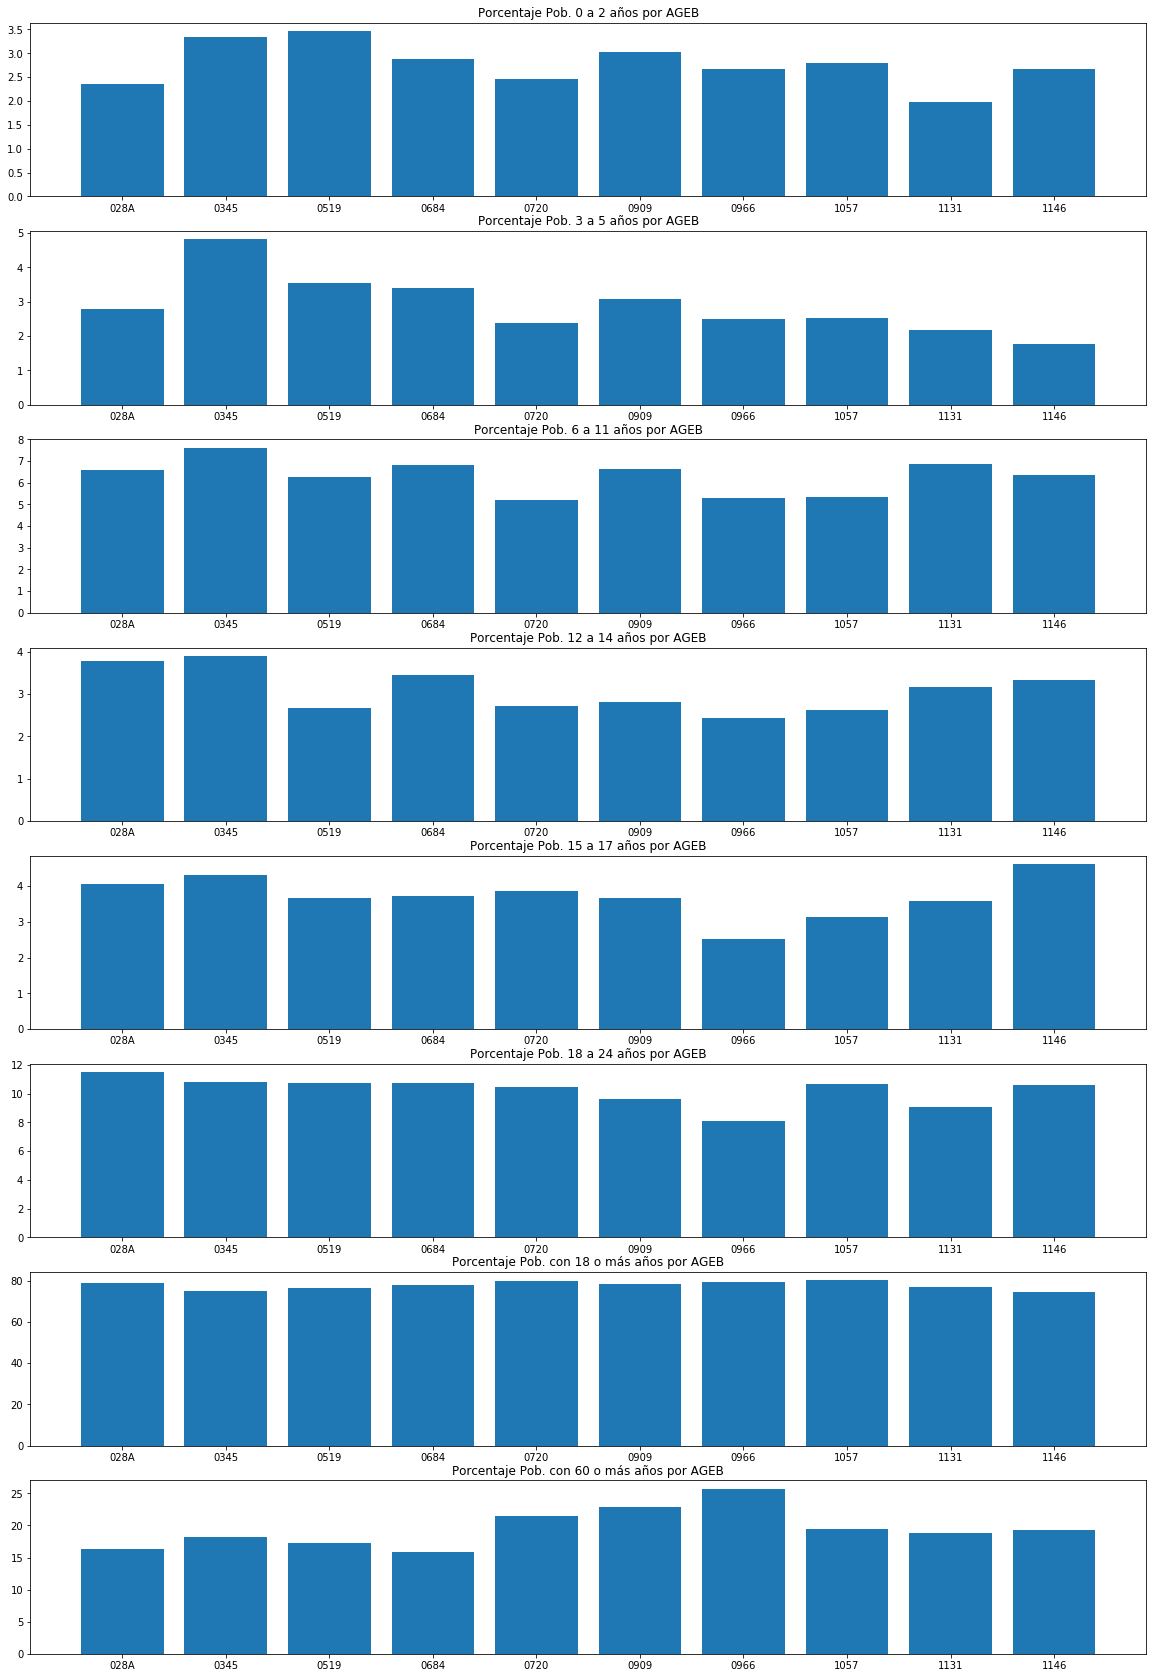

In [88]:
fig, (pob02, pob35, pob611, pob1214, pob1517, pob1824, pob18mas, pob60mas) = plt.subplots(8, figsize=(20,30))

pob02.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 0 a 2 años'])
pob02.set_title('Porcentaje Pob. 0 a 2 años por AGEB')

pob35.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 3 a 5 años'])
pob35.set_title('Porcentaje Pob. 3 a 5 años por AGEB')

pob611.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 6 a 11 años'])
pob611.set_title('Porcentaje Pob. 6 a 11 años por AGEB')

pob1214.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 12 a 14 años'])
pob1214.set_title('Porcentaje Pob. 12 a 14 años por AGEB')

pob1517.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 15 a 17 años'])
pob1517.set_title('Porcentaje Pob. 15 a 17 años por AGEB')

pob1824.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. 18 a 24 años'])
pob1824.set_title('Porcentaje Pob. 18 a 24 años por AGEB')

pob18mas.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. con 18 o más años'])
pob18mas.set_title('Porcentaje Pob. con 18 o más años por AGEB')

pob60mas.bar(filtro_edades_10['AGEB'], filtro_edades_10['Porcentaje Pob. con 60 o más años'])
pob60mas.set_title('Porcentaje Pob. con 60 o más años por AGEB')

plt.show()

In [90]:
filtro_actividades = actividades_csv.loc[(actividades_csv['ENTIDAD'] == int(Estado)) & (actividades_csv['MUN'] == int(Municipio))]
filtro_actividades_10 = filtro_actividades.loc[filtro_actividades['AGEB'].isin(ageb_keys)]

filtro_actividades_10

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,AGEB,PEA,POBTOT,Porcentaje Pob. Activa,PE_INAC,Porcentaje Pob. Inactiva,POCUPADA,Porcentaje Pob. Ocupado,PDESOCUP,Porcentaje Pob. Desocupados
21,9,Distrito Federal,2,Azcapotzalco,028A,1538.0,3257,47.221369,1273.0,39.085048,1485,45.594105,53,1.627264
27,9,Distrito Federal,2,Azcapotzalco,0345,1411.0,3821,36.927506,1729.0,45.249935,1331,34.833813,80,2.093693
42,9,Distrito Federal,2,Azcapotzalco,0519,1155.0,2513,45.961003,918.0,36.530044,1073,42.697971,82,3.263032
56,9,Distrito Federal,2,Azcapotzalco,0684,2216.0,4562,48.575186,1619.0,35.488821,2085,45.703639,131,2.871548
60,9,Distrito Federal,2,Azcapotzalco,0720,1439.0,3099,46.434334,1238.0,39.948370,1358,43.820587,81,2.613746
76,9,Distrito Federal,2,Azcapotzalco,0909,808.0,1855,43.557951,760.0,40.970350,775,41.778976,33,1.778976
81,9,Distrito Federal,2,Azcapotzalco,0966,929.0,2133,43.553680,863.0,40.459447,866,40.600094,63,2.953586
90,9,Distrito Federal,2,Azcapotzalco,1057,1359.0,2835,47.936508,1066.0,37.601411,1297,45.749559,62,2.186949
96,9,Distrito Federal,2,Azcapotzalco,1131,1306.0,2880,45.347222,1094.0,37.986111,1194,41.458333,112,3.888889
97,9,Distrito Federal,2,Azcapotzalco,1146,475.0,1083,43.859649,418.0,38.596491,443,40.904894,32,2.954755


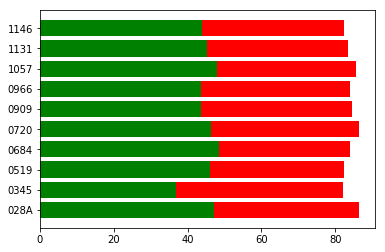

In [111]:
dic = {}

for i in filtro_actividades_10['Porcentaje Pob. Activa'].keys():
    arr = []
    arr.append(filtro_actividades_10['Porcentaje Pob. Activa'].loc[i])
    arr.append(filtro_actividades_10['Porcentaje Pob. Inactiva'].loc[i])
    dic[filtro_actividades_10['AGEB'].loc[i]] = arr
    
list_value = np.array(list(dic.values()))
list_inv = list(list_value.cumsum(axis=1))
list_key = list(filtro_actividades_10['AGEB'])

for i in range(len(list_key)):
    plt.barh(list_key[i], list_value[i], left=list_inv[i]-list_value[i], color=['green', 'red'])

In [112]:
# Nivel Socioeconómico by Erick

In [116]:
keys = ['ENTIDAD', 
       'NOM_ENT',
       'MUN', 
       'NOM_MUN', 
       'LOC', 
       'NOM_LOC',
       'AGEB', 
       'GRAPROES',
       'Viviendas que no disponen de excusado o sanitario', 
       'Viviendas que no disponen de lavadora',
       'Viviendas que no disponen de refrigerador',
       'Viviendas que no disponen de teléfono fijo',
       'Viviendas con piso de tierra',
       'Viviendas que no disponen de agua entubada de la red pública',
       'Viviendas que no disponen de drenaje',
       'Viviendas que no disponen de energía eléctrica']
nivel_socio_df = filtro_mun[keys].copy()
nivel_socio_df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,GRAPROES,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica
0,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0010,11.0,0.7,6.5,1.4,7.9,0.6,0.1,0.1,0.0
1,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0025,10.0,0.3,14.4,2.9,16.3,0.0,0.0,0.0,0.0
2,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,003A,10.0,0.3,11.4,1.6,15.6,0.0,0.1,0.1,0.0
3,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0044,10.0,0.4,11.4,2.2,13.5,0.2,0.1,0.0,0.0
4,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0097,11.0,0.2,8.1,1.1,7.2,0.4,0.0,0.0,0.0


In [119]:
# max_graproes = nivel_socio_df.loc[nivel_socio_df['GRAPROES'] == nivel_socio_df['GRAPROES'].max()].copy()
max_graproes = nivel_socio_df.loc[nivel_socio_df['AGEB'].isin(ageb_keys)]
max_graproes = max_graproes.sort_values(by='GRAPROES',ascending=False)
max_graproes

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,GRAPROES,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica
60,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0720,13.0,0.4,9.7,1.6,7.8,0.1,0.1,0.0,0.0
81,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0966,13.0,1.8,2.7,0.7,2.8,0.5,0.2,0.0,0.0
90,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1057,13.0,0.3,10.6,1.2,10.3,0.7,0.0,0.0,0.0
21,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,028A,12.0,0.4,9.3,2.4,14.1,0.1,0.3,0.0,0.0
42,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0519,12.0,0.5,13.0,4.1,16.7,0.1,0.0,0.1,0.3
56,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0684,12.0,0.8,14.4,5.3,20.3,0.1,0.1,0.0,0.0
76,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0909,12.0,0.0,9.7,2.3,9.2,0.0,0.3,0.0,0.2
96,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1131,12.0,0.1,8.3,1.2,8.9,0.0,0.1,0.0,0.1
97,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1146,12.0,0.0,11.6,0.9,7.6,0.0,1.7,0.0,0.0
27,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0345,10.0,0.9,19.8,8.1,27.3,0.7,0.0,0.1,0.0


In [121]:
max_graproes['Promedio Total'] = max_graproes[keys[8:]].mean(axis=1)
max_graproes

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,GRAPROES,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Promedio Total
60,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0720,13.0,0.4,9.7,1.6,7.8,0.1,0.1,0.0,0.0,2.4625
81,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0966,13.0,1.8,2.7,0.7,2.8,0.5,0.2,0.0,0.0,1.0875
90,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1057,13.0,0.3,10.6,1.2,10.3,0.7,0.0,0.0,0.0,2.8875
21,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,028A,12.0,0.4,9.3,2.4,14.1,0.1,0.3,0.0,0.0,3.3250
42,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0519,12.0,0.5,13.0,4.1,16.7,0.1,0.0,0.1,0.3,4.3500
56,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0684,12.0,0.8,14.4,5.3,20.3,0.1,0.1,0.0,0.0,5.1250
76,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0909,12.0,0.0,9.7,2.3,9.2,0.0,0.3,0.0,0.2,2.7125
96,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1131,12.0,0.1,8.3,1.2,8.9,0.0,0.1,0.0,0.1,2.3375
97,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1146,12.0,0.0,11.6,0.9,7.6,0.0,1.7,0.0,0.0,2.7250
27,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0345,10.0,0.9,19.8,8.1,27.3,0.7,0.0,0.1,0.0,7.1125


In [123]:
# Filtar por mayor grado de escolaridad
max_graproes = max_graproes.loc[max_graproes['GRAPROES'] == max_graproes['GRAPROES'].max()]
max_graproes

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,GRAPROES,Viviendas que no disponen de excusado o sanitario,Viviendas que no disponen de lavadora,Viviendas que no disponen de refrigerador,Viviendas que no disponen de teléfono fijo,Viviendas con piso de tierra,Viviendas que no disponen de agua entubada de la red pública,Viviendas que no disponen de drenaje,Viviendas que no disponen de energía eléctrica,Promedio Total
60,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0720,13.0,0.4,9.7,1.6,7.8,0.1,0.1,0.0,0.0,2.4625
81,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,0966,13.0,1.8,2.7,0.7,2.8,0.5,0.2,0.0,0.0,1.0875
90,9,Distrito Federal,2,Azcapotzalco,1,Total AGEB urbana,1057,13.0,0.3,10.6,1.2,10.3,0.7,0.0,0.0,0.0,2.8875


In [124]:
min_ave = max_graproes['Promedio Total'].idxmin()

# Mejor AGEB por porcentaje más bajo
max_graproes.loc[min_ave]

ENTIDAD                                                                         9
NOM_ENT                                                          Distrito Federal
MUN                                                                             2
NOM_MUN                                                              Azcapotzalco
LOC                                                                             1
NOM_LOC                                                         Total AGEB urbana
AGEB                                                                         0966
GRAPROES                                                                       13
Viviendas que no disponen de excusado o sanitario                             1.8
Viviendas que no disponen de lavadora                                         2.7
Viviendas que no disponen de refrigerador                                     0.7
Viviendas que no disponen de teléfono fijo                                    2.8
Viviendas con pi

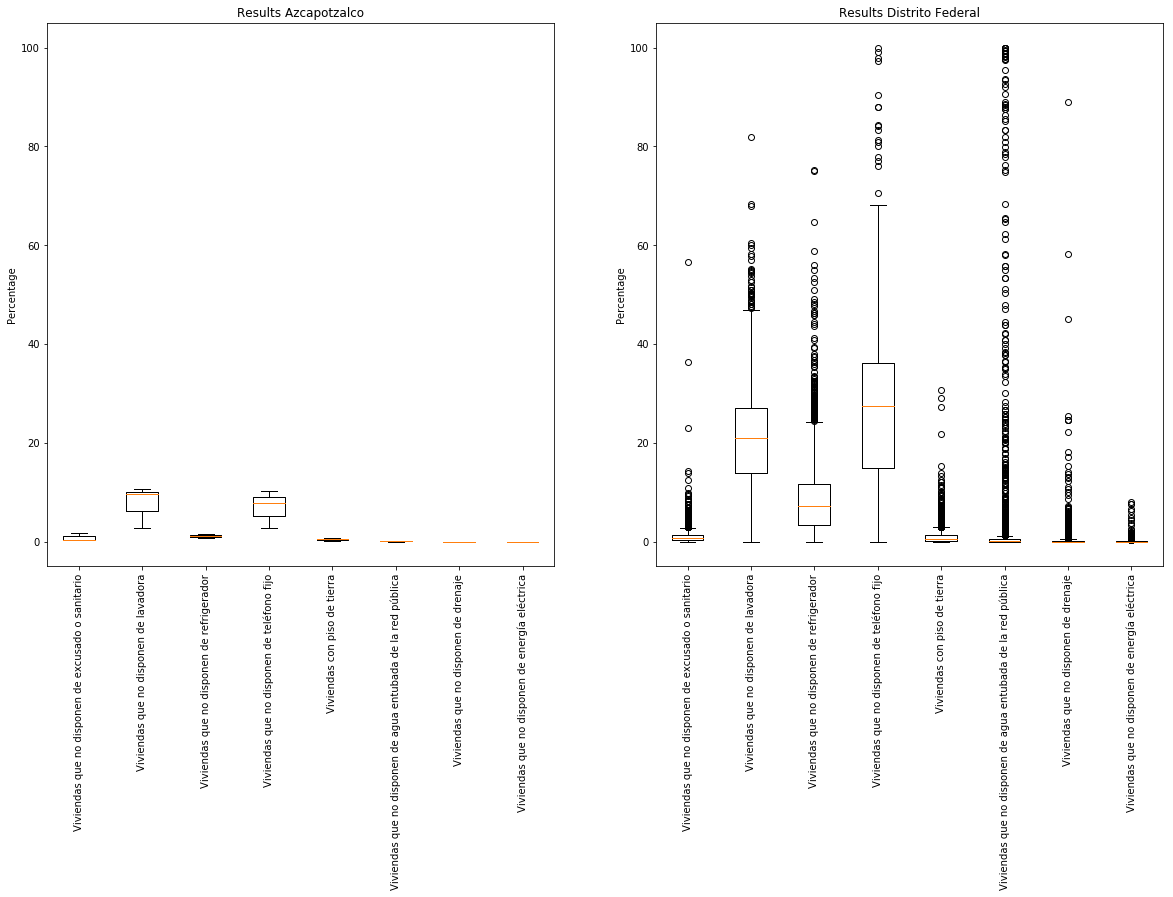

In [125]:
# Generar gráficas para comparar Viviendas

data = [max_graproes[k] for k in keys[8:]]
data_est = [filtro_estado[ke].loc[filtro_estado[ke].notnull()] for ke in keys[8:]]

fig, (box, box_est) = plt.subplots(1, 2, figsize=(20,10))

box.boxplot(data, labels=keys[8:])
box.set_title(f"Results {max_graproes.loc[min_ave]['NOM_MUN']}")
box.set_ylabel("Percentage")
box.set_xticklabels(labels=keys[8:],rotation=90)
box.set_ylim((-5,105))
              
# Resultados a nivel estatal

box_est.boxplot(data_est, labels=keys[8:])
box_est.set_title(f"Results {filtro_estado.loc[min_ave]['NOM_ENT']}")
box_est.set_ylabel("Percentage")  
box_est.set_xticklabels(labels=keys[8:], rotation=90)
box_est.set_ylim((-5,105))

plt.show()
             